## 讀取 txt 檔
* 請讀取 [text file](https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt)
* 懶人複製連結: https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt

### Hints: 使用 [Request](https://blog.gtwang.org/programming/python-requests-module-tutorial/) 抓取資料
### Hints: [字串分割](http://www.runoob.com/python/att-string-split.html)
### Hints: 例外處理: [Try-Except](https://pydoing.blogspot.com/2011/01/python-try.html)

In [30]:
## 假如我們不想把資料載到自己的電腦裡?
# 把連結填入
target_url = "https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt"

In [31]:
import requests
response = requests.get(target_url)
data = response.text

# 用 request 傳送回來的資料不會認得斷行符號
print(len(data))
data[0:100]

784594


'n00015388_157\thttp://farm1.static.flickr.com/145/430300483_21e993670c.jpg\nn00015388_238\thttp://farm2'

In [32]:
# 找到換行符號，用該符號做字串分割後，把它拿掉
split_tag = '\n'
data = data.split(split_tag)
print(len(data))
data[0]

9996


'n00015388_157\thttp://farm1.static.flickr.com/145/430300483_21e993670c.jpg'

## 將 txt 轉成 pandas dataframe

In [36]:
import pandas as pd
arrange_data = []
for line in data:
    line = line.replace('\t', ',').split(',') # 將每句最後的 \t 取代成空值後，再以逗號斷句
    arrange_data.append(line)
# print(arrange_data)
df = pd.DataFrame(arrange_data)
df.head()

,0,1,2,3,4
0,n00015388_157,http://farm1.static.flickr.com/145/430300483_2...,None,None,None
1,n00015388_238,http://farm2.static.flickr.com/1005/3352960681...,None,None,None
2,n00015388_304,http://farm1.static.flickr.com/27/51009336_a96...,None,None,None
3,n00015388_327,http://farm4.static.flickr.com/3025/2444687979...,None,None,None
4,n00015388_355,http://img100.imageshack.us/img100/3253/forres...,None,None,None


## 讀取圖片，請讀取上面 data frame 中的前 5 張圖片

http://farm1.static.flickr.com/145/430300483_21e993670c.jpg


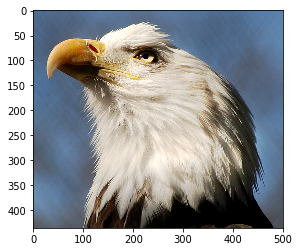

In [63]:
from PIL import Image
from io import BytesIO
import numpy as np
import matplotlib.pyplot as plt

# 請用 df.loc[...] 得到第一筆資料的連結
first_link = df.loc[0,1]
print(first_link)

response = requests.get(first_link)
img = Image.open(BytesIO(response.content))

# Convert img to numpy array

plt.imshow(img)
plt.show()

In [68]:
def img2arr_fromURLs(url_list, resize = bool):
    """
    請完成這個 Function
    Args
        - url_list: list of URLs
        - resize: bool
    Return
        - list of array
    """
    temp_list = []
    for i in url_list:
        response = requests.get(i)
        img = Image.open(BytesIO(response.content))
        img_list.append(i)
    return img_list

In [69]:
result = img2arr_fromURLs(df[0:5][1].values)
print(result)
print("Total images that we got: %i " % len(result)) # 如果不等於 5, 代表有些連結失效囉

for im_get in result:
    plt.imshow(im_get)
    plt.show()

OSError: cannot identify image file <_io.BytesIO object at 0x000001917158A258>